# Comparativo pra múltiplas seeds

In [1]:
#todo: indicar qual gradiente pertece a qual camada automaticamente -> net diferente de 2 camadas
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import pandas as pd
import numpy as np
import os

def plot_mi(indice: int):
    direc = f'teste/{indice}/'
    data = pd.read_csv(direc + 'resultados.csv')
    drop_list = ['n_updates', 'learning_rate', 'range']
    for i in drop_list:
        data.drop(data.filter(like = i), axis= 1, inplace= True) #type: ignore
    loss_data = data.filter(like= 'loss')
    grad_data = data.filter(like= 'layer')
    mutual_data = data.filter(like = 'mutual')
    data.drop(loss_data, axis = 1, inplace= True) #type: ignore
    data.drop(grad_data, axis = 1, inplace= True) #type: ignore
    data.drop(mutual_data, axis = 1, inplace= True) #type: ignore

    lista = [['train/mutual_info_0','train/mutual_info_3', 'darkorange'], 
             ['train/mutual_info_1','train/mutual_info_4', 'b']]

    min_y = mutual_data[[lista[0][1], lista[1][1]]].min().min()
    max_y = mutual_data[[lista[0][1], lista[1][1]]].max().max()
    margin_y = 0.1 * (max_y - min_y)

    min_x = mutual_data[[lista[0][0], lista[1][0]]].min().min()
    max_x = mutual_data[[lista[0][0], lista[1][0]]].max().max()
    margin_x = 0.1 * (max_x - min_x)

    for j in range(len(mutual_data['train/mutual_info_0'])):
        for i in lista:
            plt.scatter(x= mutual_data[i[0]][j],y= mutual_data[i[1]][j], c = i[2])
        plt.xlabel('I(X, T)')
        plt.ylabel('I(T, Y)')
        plt.legend(['1st layer', '2nd layer'])
        plt.ylim(min_y - margin_y, max_y + margin_y)
        plt.xlim(min_x - margin_x, max_x + margin_x)
        plt.title(f'Iteration {str(j).zfill(3)}')
        plt.tight_layout()
        plt.savefig(f'{direc}plots/plot_{str(j).zfill(3)}.jpg')
        plt.clf()
    
    filenames = [direc + 'plots/' + i for i in os.listdir(direc + 'plots')]
    clip = mpy.ImageSequenceClip(filenames, fps=15)
    clip.write_videofile(direc + f"IP_evo_{indice}.mp4", logger = None)


In [ ]:
from utils import Experimento, alerta

params = {
    'env_id': 'CartPole-v1',
    'n_envs': 1,
    'fib_seeds': [0],
    'timesteps': int(1e5),
    'recording': False,
    'device': 'cpu',
    'reference_agent': 'agente_treinado.zip',
    'coleta': False
}

for i in range(50):
    params['fib_seeds'] = [i]
    params['direc'] = f'teste/{i}/resultados.csv'
    teste = Experimento(params)
    
    if not os.path.exists(f'teste/{i}'):
        os.makedirs(f'teste/{i}')
        os.makedirs(f'teste/{i}/plots')

    teste.treinamento()
    plot_mi(i)
alerta()

<Figure size 640x480 with 0 Axes>

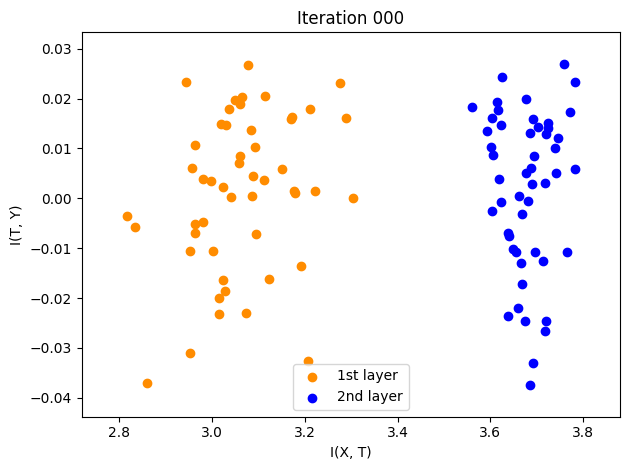

<Figure size 640x480 with 0 Axes>

In [ ]:
# varre as pastas de teste e plota o gráfico de scatter de múltiplas runs
import matplotlib.pyplot as plt
import moviepy.editor as mpy
import pandas as pd
import numpy as np
import os

lista = [['train/mutual_info_0','train/mutual_info_10', 'darkorange'],
         ['train/mutual_info_1','train/mutual_info_11', 'b']]
data = []

pastas = [i for i in os.listdir('teste')]
for indice in pastas:
    if indice.isdecimal():
        direc = f'teste/{indice}/'
        data.append(pd.read_csv(direc + 'resultados.csv'))

for j in range(len(data[0])):
    for k in range(len(data)):
        for exemplo in lista:
            plt.scatter(x= data[k][exemplo[0]][j],y= data[k][exemplo[1]][j], c = exemplo[2])

    min_y = min([i[[lista[0][1], lista[1][1]]].min().min() for i in data])
    max_y = max([i[[lista[0][1], lista[1][1]]].max().max() for i in data])
    margin_y = 0.1 * (max_y - min_y)

    min_x = min([i[[lista[0][0], lista[1][0]]].min().min() for i in data])
    max_x = max([i[[lista[0][0], lista[1][0]]].max().max() for i in data])
    margin_x = 0.1 * (max_x - min_x)

    plt.xlabel('I(X, T)')
    plt.ylabel('I(T, Y)')
    plt.legend(['1st layer', '2nd layer'])
    plt.ylim(min_y - margin_y, max_y + margin_y)
    plt.xlim(min_x - margin_x, max_x + margin_x)
    
    plt.title(f'Iteration {str(j).zfill(3)}')
    plt.tight_layout()
    plt.savefig(f'teste/plots/plot_{str(j).zfill(3)}.jpg')
    plt.clf()

filenames = ['teste/plots/' + i for i in os.listdir('teste/plots')]
clip = mpy.ImageSequenceClip(filenames, fps=15)
clip.write_videofile('teste/' + f"IP_evo_{indice}.mp4", logger = None)